# Optimisez la gestion des données d'une boutique avec Python

1. Traitement des fichiers
    - 1.1. Fichier 'erp'
        - 1.1.1. Lecture du fichier
        - 1.1.2. Nettoyage du fichier
    - 1.2. Fichier 'web'
        - 1.2.1. Lecture du fichier
        - 1.2.2. Nettoyage du fichier
    - 1.3. Fichier 'liaison'
        - 1.2.1. Lecture du fichier
        - 1.2.2. Nettoyage du fichier
1. Réponses aux questions de LAURENT
    - 2.1. Joindre les 3 dataframes 'erp','web'et 'liaison'
    - 2.2. Le chiffre d’affaire par produit
    - 2.3. Le chiffre d’affaire total réalisé en ligne
    - 2.4 Analyse sur la variable prix
        - 2.4.1 Description de la variable prix
        - 2.4.2 Visualisation à l'aide de graphiques 'histogramme' et 'boîte à moustaches'
        - 2.4.3 Chercher les outliers (aberrantes) avec la méthode IQR
        - 2.4.4 Chercher les outliers avec la methode Z-score
        - 2.4.5 Visualisation à l'aide de graphiques ' nuage de points'
        - 2.4.6 Calcul du chiffre d’affaire total réalisé en ligne si suppression des valeurs aberrantes (Z-score, threshold=2 )
        
1. Conclusions et Solutions

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image, display

## 1. Traitement des fichiers :

### 1.1. Fichier 'erp'

#### 1.1.1 Lecture du fichier

In [2]:
# Charger le fichier 
erp = pd.read_excel(r"Data\Fichier_erp.xlsx", engine="openpyxl")

c:\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# Voir les 10 premières lignes du dataFrame
erp.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
5,4040,1,34.3,0,outofstock
6,4041,1,32.7,15,instock
7,4042,1,31.2,34,instock
8,4043,1,60.0,12,instock
9,4045,1,42.6,66,instock


In [4]:
# Obtenir les détails essentiels sur notre dataFrame
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
# Voir les statistiques diverses (moyenne, maximum, minimum, etc.) du dataFrame 
erp.describe(include="all")

,product_id,onsale_web,price,stock_quantity,stock_status
count,825.000000,825.000000,825.000000,825.000000,825
unique,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,instock
freq,NaN,NaN,NaN,NaN,638
mean,5162.597576,0.869091,32.384000,26.583030,NaN
std,902.644635,0.337506,26.832271,45.875948,NaN
min,3847.000000,0.000000,-8.000000,-1.000000,NaN
25%,4348.000000,1.000000,14.600000,1.000000,NaN
50%,4907.000000,1.000000,24.400000,11.000000,NaN
75%,5805.000000,1.000000,42.000000,34.000000,NaN


In [6]:
# Obtenir le nombre de lignes et le nombre de colonnes
erp.shape

(825, 5)

#### 1.1.2. Nettoyage du fichier

In [7]:
# Vérification des doublons
erp.duplicated(['product_id']).sum()

0

In [8]:
# Vérification des valeurs manquantes
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

### 1.2. Fichier 'web'

#### 1.2.1. Lecture du fichier 

In [9]:
web = pd.read_excel(r"Data\Fichier_web.xlsx")

c:\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [10]:
web.head(10)

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
7,15740,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-04-25 12:32:17,...,jean-faure-saint-emilion-grand-cru-2015,2020-08-27 11:35:02,2020-08-27 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
8,14253,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-20 15:29:32,...,domaine-huet-vouvray-haut-lieu-sec-2016,2020-07-22 09:55:01,2020-07-22 07:55:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
9,14106,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-06-08 09:54:21,...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [11]:
web.shape

(1513, 28)

In [12]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [13]:
web.describe(include="all")

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
count,1428.0,1513.0,1513.0,1513.0,1430.0,1430.000000,716,0.0,1430.000000,1430,...,1430,1430,1430,0.0,1430.0,1430,1430.0,1430,714,1430.0
unique,714.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,716,NaN,NaN,NaN,NaN,1429,NaN,2,1,NaN
top,16004.0,NaN,NaN,NaN,NaN,NaN,taxable,NaN,NaN,NaN,...,chateau-du-couvent-pomerol-2017,NaN,NaN,NaN,NaN,https://www.bottle-neck.fr/?post_type=product&...,NaN,product,image/jpeg,NaN
freq,2.0,NaN,NaN,NaN,NaN,NaN,716,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,2,NaN,716,714,NaN
mean,NaN,0.0,0.0,0.0,0.0,3.855245,NaN,NaN,1.998601,2018-08-22 03:22:17.090909184,...,NaN,2020-06-20 13:59:29.781818112,2020-06-20 12:06:02.509090816,NaN,0.0,NaN,0.0,NaN,NaN,0.0
min,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,1.000000,2018-02-08 12:58:52,...,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,NaN,0.0,NaN,NaN,0.0
25%,NaN,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,2.000000,2018-02-27 20:01:12.500000,...,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,NaN,0.0,NaN,NaN,0.0
50%,NaN,0.0,0.0,0.0,0.0,1.000000,NaN,NaN,2.000000,2018-04-19 14:56:05,...,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,NaN,0.0,NaN,NaN,0.0
75%,NaN,0.0,0.0,0.0,0.0,4.000000,NaN,NaN,2.000000,2019-01-31 14:35:47,...,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,NaN,0.0,NaN,NaN,0.0
max,NaN,0.0,0.0,0.0,0.0,96.000000,NaN,NaN,2.000000,2020-07-20 11:00:00,...,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,NaN,0.0,NaN,NaN,0.0


#### 1.2.2. Nettoyage du fichier

In [14]:
# Supprimer les colonnes avec des valeurs nulles, '0', et les information inutiles
list_drop = ['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_class', 'post_content', 'post_password', 'post_content_filtered', 'post_parent', 'menu_order', 'post_mime_type', 'comment_count', 'post_title','post_date_gmt','guid', 'post_modified'] 
web = web.drop(list_drop,axis = 1)

In [15]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   total_sales        1430 non-null   float64       
 2   tax_status         716 non-null    object        
 3   post_author        1430 non-null   float64       
 4   post_date          1430 non-null   datetime64[ns]
 5   post_excerpt       716 non-null    object        
 6   post_status        1430 non-null   object        
 7   comment_status     1430 non-null   object        
 8   ping_status        1430 non-null   object        
 9   post_name          1430 non-null   object        
 10  post_modified_gmt  1430 non-null   datetime64[ns]
 11  post_type          1430 non-null   object        
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 142.0+ KB


In [16]:
#Changer le nom de la colonne 'sku' en 'id_web'
web = web.rename(columns={'sku':'id_web'})

In [17]:
# chercher les données erreurs
web.id_web.unique()

array([16004, nan, 15075, 16209, 15763, 13895, 12857, 15740, 14253, 14106,
       13996, 16146, 15895, 15861, 15428, 15310, 14372, 812, 7033, 7032,
       16077, 16237, 16028, 1364, 13913, 15202, 15576, 19815, 15148,
       15774, 14982, 15339, 15382, 15325, 15945, 14941, 15241, 12641,
       16269, 12942, 15344, 15661, 16274, 14661, 15718, 14395, 15254,
       16056, 14839, 13957, 15476, 13515, 15004, 15070, 15032, 16042,
       16063, 11602, 16005, 16283, 15615, 15206, 13520, 19821, 15296,
       11847, 14371, 15678, 16416, 16130, 15921, 15378, 15141, 14805,
       16044, 16238, 16129, 15280, 15038, 16081, 16281, 16505, 15880,
       14101, 16527, 15649, 16072, 15621, 14604, 15329, 15812, 15733,
       15237, 16191, 14099, 15711, 15261, 15790, 12194, 15414, 15482,
       15030, 14950, 15892, 13412, 15425, 16567, 13762, 16246, 807, 15316,
       15933, 15868, 15478, 15444, 15269, 14000, 16186, 13904, 16043,
       16247, 793, 14302, 14192, 14508, 10775, 15448, 15736, 15648, 15342,
   

La donnée 'bon-cadeau-25-euros' n'est pas normalisée comme les autres, mais nous la conservons car celà n'a pas d'impact.

une donnée apparait avec un '-1' et doit être corrigée.

In [18]:
# Ramplacer le donnée '13127-1'  par '13127'
web['id_web'].replace(['13127-1'], 13127, inplace=True)

In [19]:
web.isnull().sum()

id_web                85
total_sales           83
tax_status           797
post_author           83
post_date             83
post_excerpt         797
post_status           83
comment_status        83
ping_status           83
post_name             83
post_modified_gmt     83
post_type             83
dtype: int64

In [20]:
web[web.isna().any(axis=1)]

,id_web,total_sales,tax_status,post_author,post_date,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified_gmt,post_type
0,16004,5.0,NaN,2.0,2018-06-07 16:27:25,NaN,publish,closed,closed,chateau-du-couvent-pomerol-2017,2020-08-25 16:35:02,attachment
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,15763,1.0,NaN,2.0,2020-01-25 14:08:16,NaN,publish,closed,closed,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 09:35:02,attachment
7,15740,0.0,NaN,2.0,2020-04-25 12:32:17,NaN,publish,closed,closed,jean-faure-saint-emilion-grand-cru-2015,2020-08-27 09:35:02,attachment
8,14253,0.0,NaN,2.0,2018-02-20 15:29:32,NaN,publish,closed,closed,domaine-huet-vouvray-haut-lieu-sec-2016,2020-07-22 07:55:01,attachment
...,...,...,...,...,...,...,...,...,...,...,...,...
1505,15949,1.0,NaN,2.0,2018-02-28 16:37:33,NaN,publish,closed,closed,domaine-de-lidylle-savoie-roussette-2018,2020-06-02 14:55:03,attachment
1506,7033,4.0,NaN,2.0,2019-03-13 13:44:44,NaN,publish,closed,closed,huile-olive-planeta-3l,2020-08-27 12:55:02,attachment
1508,12881,2.0,NaN,2.0,2019-03-28 15:25:14,NaN,publish,closed,closed,montbourgeau-etoile-vin-jaune-2009,2019-12-30 09:30:01,attachment
1511,38,38.0,NaN,2.0,2018-04-18 12:25:58,NaN,publish,closed,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 15:15:03,attachment


In [21]:
# Supprimer toutes les lignes dont toutes les valeurs sont manquantes
web = web.dropna(axis=0, how='all')

# Supprimer les lignes dont le skus est manquant
web = web.dropna(axis=0, how='any', subset=['id_web'])
web

,id_web,total_sales,tax_status,post_author,post_date,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified_gmt,post_type
0,16004,5.0,NaN,2.0,2018-06-07 16:27:25,NaN,publish,closed,closed,chateau-du-couvent-pomerol-2017,2020-08-25 16:35:02,attachment
2,15075,3.0,taxable,2.0,2018-02-14 15:39:43,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 13:35:02,product
3,16209,6.0,taxable,2.0,2018-02-14 17:15:31,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 16:05:03,product
4,15763,1.0,NaN,2.0,2020-01-25 14:08:16,NaN,publish,closed,closed,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 09:35:02,attachment
5,13895,0.0,taxable,2.0,2019-03-19 10:41:50,"<span style=""display: inline !important; float...",publish,closed,closed,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 19:11:40,product
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,2.0,NaN,2.0,2019-03-28 15:25:14,NaN,publish,closed,closed,montbourgeau-etoile-vin-jaune-2009,2019-12-30 09:30:01,attachment
1509,15663,3.0,taxable,2.0,2018-02-27 10:27:01,Le Brouilly est le plus méridional des crus du...,publish,closed,closed,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 07:35:02,product
1510,15910,0.0,taxable,2.0,2019-03-28 10:59:43,C’est dans cette cuvée la pleine expression du...,publish,closed,closed,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 08:45:02,product
1511,38,38.0,NaN,2.0,2018-04-18 12:25:58,NaN,publish,closed,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 15:15:03,attachment


In [22]:
#Verification des doublons
web.duplicated(subset=['id_web']).sum()

715

In [23]:
dupli = web[web.duplicated(subset=['id_web'])]
dupli

,id_web,total_sales,tax_status,post_author,post_date,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified_gmt,post_type
13,16209,6.0,NaN,2.0,2018-02-14 17:15:31,NaN,publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 16:05:03,attachment
53,16274,13.0,NaN,2.0,2018-05-03 13:09:18,NaN,publish,closed,closed,mourgues-du-gres-costieres-de-nimes-capitelles...,2020-08-04 16:55:02,attachment
80,12857,0.0,NaN,2.0,2018-04-12 17:56:13,NaN,publish,closed,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 15:35:02,attachment
85,15325,4.0,NaN,2.0,2019-03-27 17:59:49,NaN,publish,closed,closed,agnes-levet-amethyste-2017,2020-05-21 12:00:02,attachment
87,15038,10.0,NaN,2.0,2018-04-13 15:27:12,NaN,publish,closed,closed,gilbert-picq-chablis-vieilles-vignes-2017,2020-08-27 14:05:03,attachment
...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,2.0,NaN,2.0,2019-03-28 15:25:14,NaN,publish,closed,closed,montbourgeau-etoile-vin-jaune-2009,2019-12-30 09:30:01,attachment
1509,15663,3.0,taxable,2.0,2018-02-27 10:27:01,Le Brouilly est le plus méridional des crus du...,publish,closed,closed,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 07:35:02,product
1510,15910,0.0,taxable,2.0,2019-03-28 10:59:43,C’est dans cette cuvée la pleine expression du...,publish,closed,closed,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 08:45:02,product
1511,38,38.0,NaN,2.0,2018-04-18 12:25:58,NaN,publish,closed,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 15:15:03,attachment


In [24]:
# Vérification des écarts sur une référence
web[web['id_web'] == '15300']

,id_web,total_sales,tax_status,post_author,post_date,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified_gmt,post_type


La pluspart des doublons sont dûs au fait que pour chaque produit il y ait une ligne correspondant à la description du produit, et une autre à sa photo.

On garde donc la première ligne des données, sans l'image pour la doublons.

In [25]:
# on garde les lignes 'product' de la colonne post type
web = web[web['post_type'] == 'product']
web

,id_web,total_sales,tax_status,post_author,post_date,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified_gmt,post_type
2,15075,3.0,taxable,2.0,2018-02-14 15:39:43,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 13:35:02,product
3,16209,6.0,taxable,2.0,2018-02-14 17:15:31,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 16:05:03,product
5,13895,0.0,taxable,2.0,2019-03-19 10:41:50,"<span style=""display: inline !important; float...",publish,closed,closed,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 19:11:40,product
6,12857,0.0,taxable,2.0,2018-04-12 17:56:13,Il présente une grande fraîcheur minérale au n...,publish,closed,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 15:35:02,product
9,14106,0.0,taxable,2.0,2019-06-08 09:54:21,Ce vin peut-être dégusté sur sa jeunesse mais ...,publish,closed,closed,stephane-tissot-chateau-chalon-2011,2020-05-29 15:35:03,product
...,...,...,...,...,...,...,...,...,...,...,...,...
1501,15941,4.0,taxable,2.0,2018-02-12 14:26:52,"Un vin opulent, à la texture onctueuse, et tou...",publish,closed,closed,jerome-cotes-du-rhone-2018,2020-06-25 12:00:03,product
1503,10459,0.0,taxable,2.0,2018-04-13 15:58:19,"Robe d'un superbe rubis, dense et profond - As...",publish,closed,closed,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 12:05:02,product
1507,16320,3.0,taxable,2.0,2018-02-12 12:49:29,"Magnifique exemple d’assemblage réussi, ou cha...",publish,closed,closed,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 09:15:03,product
1509,15663,3.0,taxable,2.0,2018-02-27 10:27:01,Le Brouilly est le plus méridional des crus du...,publish,closed,closed,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 07:35:02,product


In [26]:
#Vérification des valeurs manquantes après de-doublons
web.isnull().sum()

id_web               0
total_sales          0
tax_status           0
post_author          0
post_date            0
post_excerpt         0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified_gmt    0
post_type            0
dtype: int64

In [27]:
#Taille de la dataframe après la nettoyage
web.shape

(714, 12)

### 1.3. Fichier 'liaison'

#### 1.3.1. Lecture du fichier

In [28]:
liaison = pd.read_excel(r'Data\fichier_liaison.xlsx')

c:\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [29]:
liaison.head(10)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
5,4040,15303
6,4041,14975
7,4042,16042
8,4043,14980
9,4045,16041


In [30]:

liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


on trouve qu'il y a 91 valeurs manquantes pour l' 'id_web' comparé au 'product_id'.

Peut-être parce que tout les produits ne sont pas vendus sur internet.

In [31]:
liaison.shape

(825, 2)

In [32]:
liaison.describe(include="all")

,product_id,id_web
count,825.000000,734.0
unique,NaN,734.0
top,NaN,15298.0
freq,NaN,1.0
mean,5162.597576,NaN
std,902.644635,NaN
min,3847.000000,NaN
25%,4348.000000,NaN
50%,4907.000000,NaN
75%,5805.000000,NaN


#### 1.3.2. Nettoyage du fichier

In [33]:
liaison.id_web.unique()

array([15298, 15296, 15300, 19814, 19815, 15303, 14975, 16042, 14980,
       16041, 15269, 14977, 16044, 16043, 16449, 16045, 16030, 13127,
       19816, nan, 16029, 16039, 16318, 16275, 16498, 16320, 16319, 15966,
       15022, 15967, 15490, 16416, 11862, 15444, 15953, 12045, 13074,
       15941, 16069, 13072, 15440, 13435, 13078, 13117, 16296, 16014,
       16462, 16013, 16180, 15676, 16120, 15564, 15675, 15378, 15813,
       13416, 14905, 15767, 16505, 15683, 16504, 15787, 14800, 15353,
       15382, 15339, 11668, 13209, 15341, 13217, 304, 11641, 1662, 1360,
       15648, 1364, 7086, 1366, 15140, 16238, 16237, 15141, 14944, 14941,
       14751, 16093, 15668, 15373, 15375, 14474, 15482, 13453, 15075,
       16124, 15785, 15784, 15786, 14332, 16210, 16211, 16209, 15629,
       15583, 16160, 16166, 15783, 16560, 15747, 15746, 16190, 16189,
       16265, 16191, 16263, 15605, 16529, 15441, 13032, 16256, 16322,
       16295, 15656, 15655, 15415, 15414, 15413, 16023, 16024, 15720,
       1

On constate de réference avec '-1' qu'on va supprimer

In [34]:
# Remplacer les données 
liaison['id_web'].replace(['13127-1'], 13127, inplace=True)
liaison['id_web'].replace(['14680-1'], 14680, inplace=True)

In [35]:
liaison.duplicated(['product_id', 'id_web']).sum()

0

In [36]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

## 2. Réponses aux questions de LAURENT

### 2.1. Joindre les 3 dataframes 'erp','web'et 'liaison'

In [37]:
# Joindre les 2 dataframes 'erp' et 'liaison'
erp_liaison = pd.merge(erp, liaison, on = 'product_id')
# Joindre les dataframes 'erp_liaison' et 'web'
web_erp_liaison = pd.merge(web, erp_liaison, on = 'id_web', indicator=True, how='inner')

In [38]:
# Verifier les jointures sont bien reussi
web_erp_liaison['_merge'].unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [39]:
# Afficher les infos avec la nouvelle dataframe après les jointures
web_erp_liaison.head()

,id_web,total_sales,tax_status,post_author,post_date,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified_gmt,post_type,product_id,onsale_web,price,stock_quantity,stock_status,_merge
0,15075,3.0,taxable,2.0,2018-02-14 15:39:43,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 13:35:02,product,4165,1,12.0,57,instock,both
1,16209,6.0,taxable,2.0,2018-02-14 17:15:31,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 16:05:03,product,4174,1,5.7,94,instock,both
2,13895,0.0,taxable,2.0,2019-03-19 10:41:50,"<span style=""display: inline !important; float...",publish,closed,closed,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 19:11:40,product,5796,1,12.5,12,instock,both
3,12857,0.0,taxable,2.0,2018-04-12 17:56:13,Il présente une grande fraîcheur minérale au n...,publish,closed,closed,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 15:35:02,product,4582,1,109.6,7,instock,both
4,14106,0.0,taxable,2.0,2019-06-08 09:54:21,Ce vin peut-être dégusté sur sa jeunesse mais ...,publish,closed,closed,stephane-tissot-chateau-chalon-2011,2020-05-29 15:35:03,product,6106,1,74.8,15,instock,both


In [40]:
web_erp_liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             717 non-null    object        
 1   total_sales        717 non-null    float64       
 2   tax_status         717 non-null    object        
 3   post_author        717 non-null    float64       
 4   post_date          717 non-null    datetime64[ns]
 5   post_excerpt       717 non-null    object        
 6   post_status        717 non-null    object        
 7   comment_status     717 non-null    object        
 8   ping_status        717 non-null    object        
 9   post_name          717 non-null    object        
 10  post_modified_gmt  717 non-null    datetime64[ns]
 11  post_type          717 non-null    object        
 12  product_id         717 non-null    int64         
 13  onsale_web         717 non-null    int64         
 14  price     

In [41]:
web_erp_liaison.duplicated(['product_id', 'id_web']).sum()

2

### 2.2. Le chiffre d’affaire par produit

In [42]:
# Créer une dataframe avec les colonnes utiles
ca_product = web_erp_liaison[['post_name','onsale_web','total_sales','price']].sort_values(by='post_name').copy()
ca_product.head(10)

,post_name,onsale_web,total_sales,price
163,8planeta-sicilia-etna-rosso-2018,1,0.0,18.5
17,agnes-levet-amethyste-2017,1,4.0,41.2
353,agnes-levet-cote-rotie-maestria-2017,1,3.0,55.0
48,agnes-levet-cote-rotie-peroline-2017,1,3.0,57.0
433,alain-graillot-crozes-hermitage-blanc-2018,1,10.0,24.4
711,alain-graillot-crozes-hermitage-rouge-2017,1,6.0,24.4
251,alain-graillot-crozes-hermitage-rouge-la-guira...,1,24.0,37.2
125,albert-boxler-chasselas-2016,1,6.0,19.2
183,albert-boxler-cremant-2014,1,3.0,19.2
240,albert-boxler-pinot-gris-reserve-2016,1,3.0,27.8


In [43]:
# Calcul du chiffre d’affaires par produit
ca_product['chiffre_affaire'] = ca_product['total_sales'] * ca_product['price']
ca_product

,post_name,onsale_web,total_sales,price,chiffre_affaire
163,8planeta-sicilia-etna-rosso-2018,1,0.0,18.5,0.0
17,agnes-levet-amethyste-2017,1,4.0,41.2,164.8
353,agnes-levet-cote-rotie-maestria-2017,1,3.0,55.0,165.0
48,agnes-levet-cote-rotie-peroline-2017,1,3.0,57.0,171.0
433,alain-graillot-crozes-hermitage-blanc-2018,1,10.0,24.4,244.0
...,...,...,...,...,...
218,zind-humbrecht-pinot-gris-windsbuhl-2013,1,0.0,71.5,0.0
176,zind-humbrecht-riesling-clos-windsbuhl-2014,1,0.0,69.0,0.0
16,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,1,0.0,100.0,0.0
659,zind-humbrecht-riesling-herrenweg-turckheim-2017,1,2.0,31.7,63.4


### 2.3. Le chiffre d’affaire total réalisé en ligne

In [44]:
# Verifier si tous les produits de la dataframe 'ca_produit' sont vendus en ligne
ca_product['onsale_web'].unique()

array([1, 0], dtype=int64)

In [45]:
#  Calcul du chiffre d’affaire total réalisé en ligne
ca_total = np.round(ca_product['chiffre_affaire'].sum(), 2)
print("Le total du chiffre d’affaire réalisé en ligne est: "+ str(ca_total) +'euros.')

Le total du chiffre d’affaire réalisé en ligne est: 71988.0euros.


### 2.4 Analyse sur la variable prix

#### 2.4.1 Description de la variable prix

Voir les statistiques diverses (moyenne, maximum, minimum, etc.) de la variable 'prix'
pour avoir une première idées des valeurs aberrantes.

In [46]:
# Créer la dataframe avec les colonnes utiles pour montrer le prix des produits
df_price =  web_erp_liaison[['id_web','product_id','post_name','total_sales','price']].sort_values(by='price')
df_price

,id_web,product_id,post_name,total_sales,price
210,14570,6129,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,0.0,5.2
1,16209,4174,maurel-cabardes-tradition-2017,6.0,5.7
679,16211,4173,maurel-pays-doc-chenin-colombard-2019,13.0,5.7
111,14338,5777,maurel-pays-d-oc-cabernet-sauvignon-2017,0.0,5.7
104,16210,4172,maurel-pays-oc-chardonnay-2019,43.0,5.7
...,...,...,...,...,...
177,15185,5767,camille-giroud-clos-de-vougeot-2016,0.0,175.0
186,3510,4402,cognac-frapin-vip-xo,13.0,176.0
561,14983,5892,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,3.0,191.3
318,14581,5001,david-duband-charmes-chambertin-grand-cru-2014,0.0,217.5


In [47]:
df_price.price.describe()

count    717.000000
mean      32.532357
std       27.769101
min        5.200000
25%       14.100000
50%       23.700000
75%       42.200000
max      225.000000
Name: price, dtype: float64

#### 2.4.2 Visualisation à l'aide de graphiques 'histogramme' et 'boîte à moustaches'

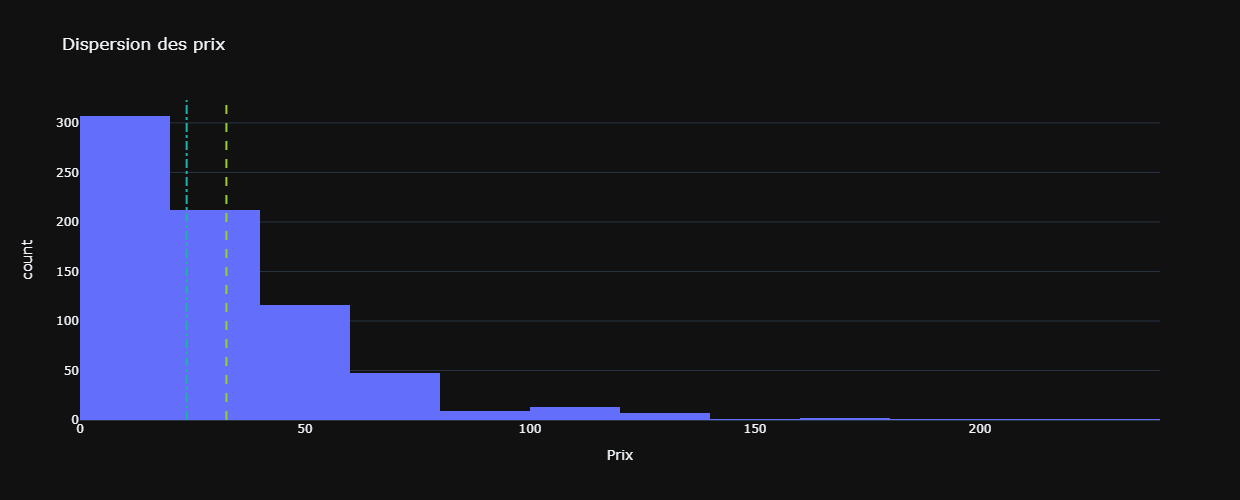

In [48]:
# Création d'un histogramme avec Plotly Express
fig = px.histogram(df_price, x='price', nbins=20, title='Dispersion des prix', labels={'price': 'Prix', 'count': 'Nombre d\'achats'})

# Ajout des lignes pour la moyenne et la médiane
mean_line = df_price['price'].mean()
median_line = df_price['price'].median()

fig.add_shape(type='line', x0=mean_line, x1=mean_line, y0=0, y1=1, xref='x', yref='paper', line=dict(color='yellowgreen', width=2, dash='dash'), name='Moyenne')
fig.add_shape(type='line', x0=median_line, x1=median_line, y0=0, y1=1, xref='x', yref='paper', line=dict(color='lightseagreen', width=2, dash='dashdot'), name='Médiane')

# Afficher la légende
fig.update_layout(template='plotly_dark', legend=dict(x=0.75, y=0.95))

# Afficher la figure
fig.show()
fig.update_layout(width=1240)
# Enregistrer en tant qu'image
fig.write_image("figure/1.png")
# Afficher le graphique sur le notebook dans le depot distant GITHUB
display(Image(filename="figure/1.png"))


On peut observer que des valeurs sont très loin de la valeur médiane et de la valeur moyenne.

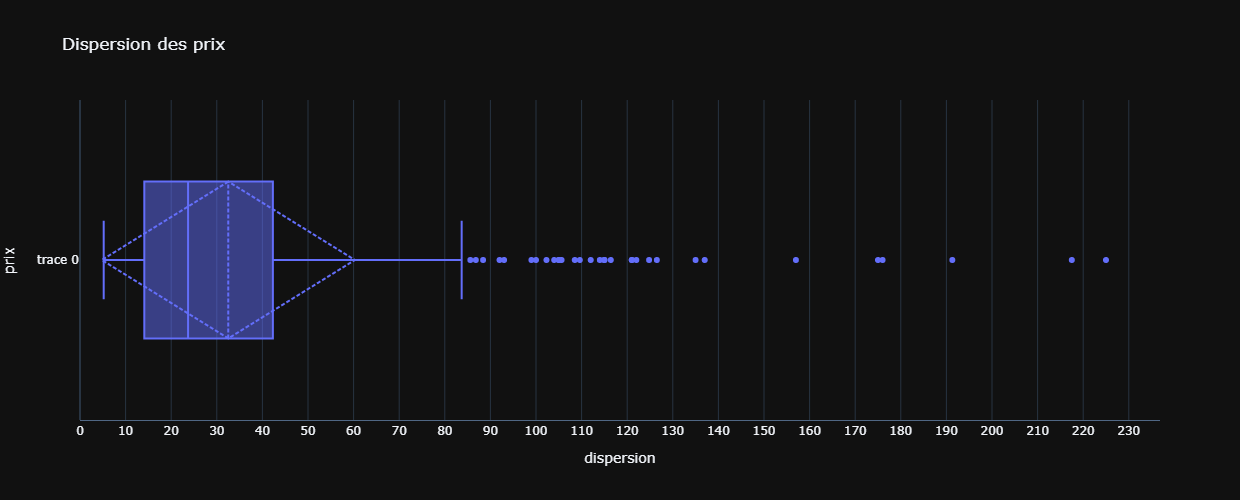

In [49]:
fig = go.Figure()
fig.add_trace(go.Box(
    x=df_price['price'],
    boxmean='sd'))
fig.update_yaxes(showticklabels = True)
fig.update_xaxes( nticks = 40,title_text = 'Prix', showline=True, linewidth=1,rangemode="tozero")
# Personnalisez le titre et les étiquettes des axes
fig.update_layout(template='plotly_dark',
    title='Dispersion des prix',
    xaxis_title='dispersion',
    yaxis_title='prix'
)

# Afficher la figure
fig.show()
fig.update_layout(width=1240)
# Enregistrer en tant qu'image
fig.write_image("figure/1.png")
# Afficher le graphique sur le notebook dans le depot distant GITHUB
display(Image(filename="figure/1.png"))

#### 2.4.3 Chercher les outliers (aberrantes) avec la méthode IQR

Les valeurs au-dessous de Q1−1.5IQ ou au-dessus de Q3+1.5IQ sont considérées comme des outliers.

In [50]:
# Calcul les deux quartiles Q1, Q2 et Q3
Q1 = df_price['price'].quantile(0.25)
Q2 = df_price['price'].quantile(0.5) # Médiane
Q3 = np.round((df_price['price'].quantile(0.75)),2)
print('Q1 = ', Q1 )
print('Q2 = ', Q2 )
print('Q3 = ', Q3)

Q1 =  14.1
Q2 =  23.7
Q3 =  42.2


In [51]:
# Calcul de l'écart interquartile IQ
IQ = Q3 - Q1
print('IQ = ', IQ)

IQ =  28.1


In [52]:
# Trouver les seuils des valeurs pour les outliers
seuil_min = np.round(Q1 - (1.5*IQ), 2)
seuil_max =  Q3 + (1.5*IQ)
print('seuil_min = ', seuil_min)
print('seuil_max = ', seuil_max)

seuil_min =  -28.05
seuil_max =  84.35000000000001


In [53]:
outlier =[]
for x in df_price['price']:
    if ((x > seuil_max) or (x < seuil_min)):
         outlier.append(x)
print('Les valeurs abérrantes sont: ', outlier)
print("Avec la methode IQR, on trouve ", len(outlier), "valeurs outliers pour la variable prix.")

Les valeurs abérrantes sont:  [85.6, 86.8, 88.4, 92.0, 93.0, 99.0, 100.0, 102.3, 104.0, 105.0, 105.0, 105.6, 108.5, 109.6, 112.0, 114.0, 115.0, 115.0, 116.4, 121.0, 121.0, 122.0, 124.8, 126.5, 135.0, 137.0, 157.0, 175.0, 176.0, 191.3, 217.5, 225.0]
Avec la methode IQR, on trouve  32 valeurs outliers pour la variable prix.


#### 2.4.4 Chercher les outliers avec la methode Z-score

95% des points de données se situent entre +/-2 écarts types (threshold = 2).

99.7% des points de données se situent entre +/-3 écarts types.

Ici, si le score Z d’un point de données est supérieur à 2 ou inférieur à -2 est considéré comme les outliers.

Z-score = (Observation - Mean)/Std.deviation.

In [54]:
df_zscore = df_price.copy()
df_zscore['z_score'] =(df_zscore.price - df_zscore.price.mean())/df_zscore.price.std()
df_zscore.head(10)

,id_web,product_id,post_name,total_sales,price,z_score
210,14570,6129,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,0.0,5.2,-0.984272
1,16209,4174,maurel-cabardes-tradition-2017,6.0,5.7,-0.966267
679,16211,4173,maurel-pays-doc-chenin-colombard-2019,13.0,5.7,-0.966267
111,14338,5777,maurel-pays-d-oc-cabernet-sauvignon-2017,0.0,5.7,-0.966267
104,16210,4172,maurel-pays-oc-chardonnay-2019,43.0,5.7,-0.966267
160,16322,4198,moulin-gassac-igp-pays-herault-guilhem-rouge-2019,0.0,5.8,-0.962666
138,16295,4200,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,46.0,5.8,-0.962666
471,16213,5779,maurel-pays-d-oc-syrah-2019,8.0,5.8,-0.962666
274,15561,5778,maurel-pays-d-oc-merot-2018,24.0,5.8,-0.962666
146,15934,4680,domaine-de-joy-cotes-de-gascogne-envie-de-joy-...,2.0,6.3,-0.944660


In [55]:
threshold_1 = 2
outlier_2 = []
for y in df_zscore['z_score']:
    if y > threshold_1:
        outlier_2.append(y)
print('Les valeurs abérrantes sont: ', outlier_2)

Les valeurs abérrantes sont:  [2.011863575557903, 2.141504070282435, 2.177515318817027, 2.393582810024581, 2.4295940585591733, 2.5124199301887353, 2.5736390526975423, 2.6096503012321346, 2.6096503012321346, 2.6312570503528896, 2.7356896711032075, 2.7753020444912586, 2.8617290409742804, 2.933751538043465, 2.969762786578057, 2.969762786578057, 3.0201785345264867, 3.185830277785611, 3.185830277785611, 3.2218415263202034, 3.3226730222170615, 3.3838921447258685, 3.6899877572699027, 3.762010254339087, 4.482235225030933, 5.130437698653593, 5.166448947188186, 5.717421049767448, 6.660915761373765, 6.931000125383207]


In [56]:
threshold_2 = 3
outlier_3 = []
for z in df_zscore['z_score']:
    if z > threshold_2:
        outlier_3.append(z)
print('Les valeurs abérrantes sont: ', outlier_3)

Les valeurs abérrantes sont:  [3.0201785345264867, 3.185830277785611, 3.185830277785611, 3.2218415263202034, 3.3226730222170615, 3.3838921447258685, 3.6899877572699027, 3.762010254339087, 4.482235225030933, 5.130437698653593, 5.166448947188186, 5.717421049767448, 6.660915761373765, 6.931000125383207]


Résultat:

In [57]:
print("Avec la methode Z-score,threshold = 2, on trouve ", len(outlier_2), "valeurs outliers pour la variable prix.")
print("Avec la methode Z-score,threshold = 3, on trouve ", len(outlier_3), "valeurs outliers pour la variable prix.")

Avec la methode Z-score,threshold = 2, on trouve  30 valeurs outliers pour la variable prix.
Avec la methode Z-score,threshold = 3, on trouve  14 valeurs outliers pour la variable prix.


#### 2.4.5 Visualisation à l'aide de graphiques ' nuage de points'

Utilisé pour observer la relation entre le prix et la quantité vendue de chaque produit.
On observe que même avec des prix beaucoup plus élevés, certain produits se vendent.

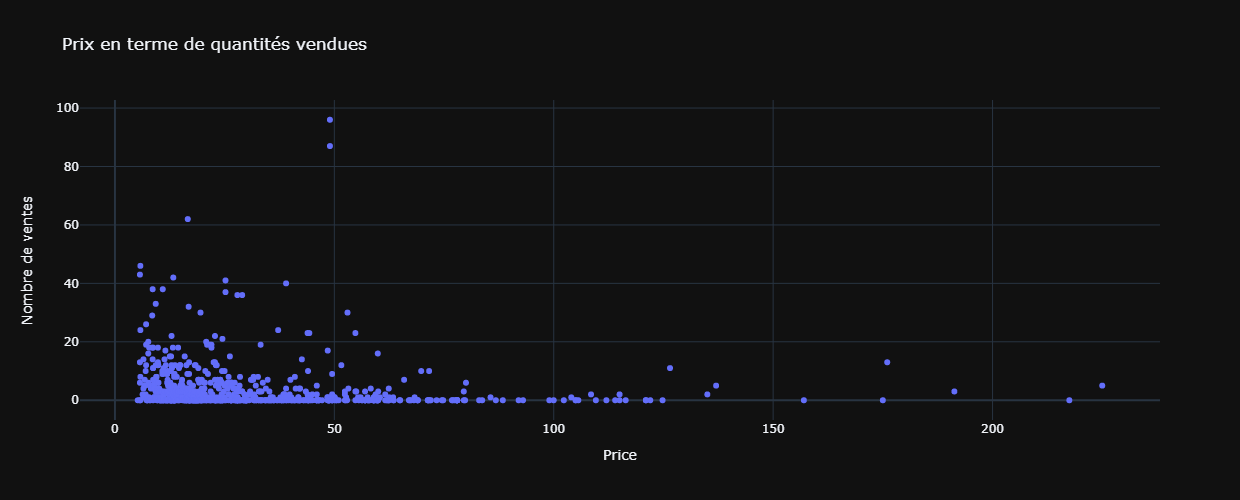

In [58]:
# Créez un graphique de dispersion avec Plotly Express
fig = px.scatter(df_price, x='price', y='total_sales', title="Prix en terme de quantités vendues")

# Personnalisez les étiquettes des axes
fig.update_xaxes(title_text="Price")
fig.update_yaxes(title_text="Nombre de ventes")
fig.update_layout(template='plotly_dark')
# Afficher la figure
fig.show()
fig.update_layout(width=1240)
# Enregistrer en tant qu'image
fig.write_image("figure/1.png")
# Afficher le graphique sur le notebook dans le depot distant GITHUB
display(Image(filename="figure/1.png"))

Conclusion:

Dans notre base de données, nous identifions:

32 valeurs outliers avec la méthode IQR (basée sur la médiane)

30 valeurs outliers avec la méthode Z-score (basée sur la moyenne) avec un intervalle de confiance de 2 écarts type.

14 valeurs outliers avec la méthode Z-score (basée sur la moyenne) avec un intervalle de confiance de 3 écarts type.

On remarque donc que c'est la valeur à 2 écarts type qui se rapproche le plus du IQR.

#### 2.4.6 Calcul du chiffre d’affaire total réalisé en ligne si suppression des valeurs aberrantes (Z-score, threshold=2 )

In [59]:
df_zscore_outlier = df_zscore.loc[df_zscore.z_score.abs()>2]
df_zscore_outlier

,id_web,product_id,post_name,total_sales,price,z_score
152,11668,4132,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,0.0,88.4,2.011864
548,19822,5565,tempier-bandol-cabassaou-2017,0.0,92.0,2.141504
439,14774,5916,wemyss-malts-single-cask-chocolate-moka-cake,0.0,93.0,2.177515
119,11601,6214,domaine-des-comtes-lafon-volnay-1er-cru-champa...,0.0,99.0,2.393583
16,15382,4115,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,0.0,100.0,2.429594
37,14805,4903,domaine-des-croix-corton-grand-cru-les-greves-...,0.0,102.3,2.512420
413,3509,4407,cognac-frapin-cigar-blend,1.0,104.0,2.573639
102,12791,5007,domaine-des-comtes-lafon-volnay-1er-cru-santen...,0.0,105.0,2.609650
232,11602,5008,domaine-des-comtes-lafon-volnay-1er-cru-santen...,0.0,105.0,2.609650
289,14596,6201,david-duband-chambolle-musigny-1er-cru-les-sen...,0.0,105.6,2.631257


In [60]:
ca_aberrant = (df_zscore_outlier['total_sales'] * df_zscore_outlier['price']).sum()
print(" Le total du chiffre d’affaires avec les valeurs aberrantes est: ",ca_aberrant, "euros." )

 Le total du chiffre d’affaires avec les valeurs aberrantes est:  6884.4 euros.


In [61]:
ca_after = np.round((ca_total - ca_aberrant),2)
print("Après suppression des valeurs aberrantes, le chiffre d’affaires total réalisé en ligne est de: ",ca_after, "euros, moins", ca_aberrant, "euros qu'avant." )

Après suppression des valeurs aberrantes, le chiffre d’affaires total réalisé en ligne est de:  65103.6 euros, moins 6884.4 euros qu'avant.


## 3. Conclusions et Solutions:

Les valeurs aberrantes, ou plutôt incohérentes, influencent certains paramètres statistiques, par exemple, la moyenne. Cela peut fausser la compréhension du jeu de données et nous conduire à émettre des hypothèses erronées sur ce dernier.

Dans notre cas d'étude il est tout à fait possible qu'il y ait une grosse différence de prix entre certaines catégories de vins, avec des prix entre 5.2 et 225 euros. Pour le vérifier, il aurait fallu disposer de données relatives au prix par type de vin (Beaujolais, Bourgogne, Champagne,...) afin de pouvoir créer des box-plot différenciées.

Dans le cas échéant il existe 3 méthodes couramment utilisées pour traiter les valeurs aberrantes.

1 - Suppression des valeurs aberrantes:

Nous pouvons facilement supprimer les valeurs aberrantes, mais cela restreint nos données. Si nous avons beaucoup de lignes, de données, nous pouvons peut-être prendre des risques.

2 - Méthode Winsorize:

Dans la méthode Winsorize, nous devons importer winsorize depuis Scipy. Nous limitons les valeurs aberrantes avec une limite supérieure et inférieure. Nous fixerons les limites. Nous ferons de nos limites supérieures et inférieures pour les données nos nouveaux points maximum et minimum.

3 - Transformation du journal:

Couramment utilisée sur des données biaisées. La transformation du journal réduit l'asymétrie des données et tente de la rendre normale. La transformation du journal ne la rend pas toujours normale, elle rend parfois les données plus biaisées. Cela dépend donc des données. Nous devons appliquer la transformation et contrôler le résultat. Pour cela il faut implémenter la transformation du journal de NumPy avec np.log